In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [3]:
!curl -LJO https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: raw.githubusercontent.com


In [4]:
df = pd.read_csv('housing.csv')

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


C:\Users\vabal\anaconda3\envs\ml-zoomcamp\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vabal\anaconda3\envs\ml-zoomcamp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='median_house_value', ylabel='Count'>

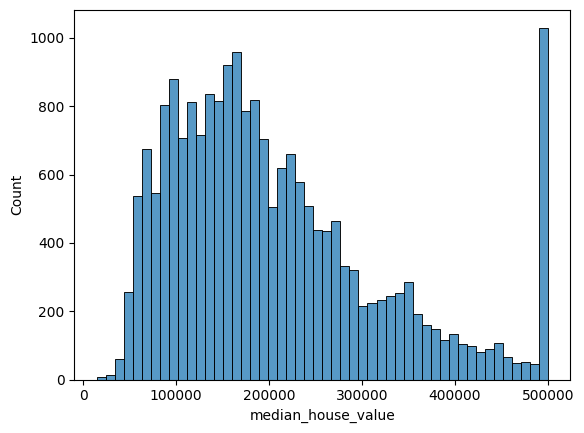

In [7]:
sns.histplot(df['median_house_value'], bins=50)

In [8]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [9]:
# subset dataframe according to instructions
df = df[(df['ocean_proximity']=='<1H OCEAN') | (df['ocean_proximity']=='INLAND')][['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']]

In [10]:
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [11]:
# Question 1
df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

C:\Users\vabal\anaconda3\envs\ml-zoomcamp\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vabal\anaconda3\envs\ml-zoomcamp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='population', ylabel='Count'>

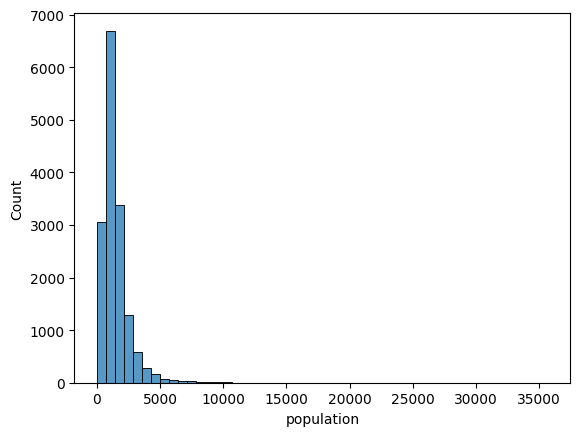

In [12]:
sns.histplot(df['population'], bins=50)

In [13]:
# Question 2
df['population'].median()

1195.0

In [14]:
n = len(df)
n_val = int(len(df)*0.2)
n_test = int(len(df)*0.2)
n_train = n - n_val - n_test
n_train, n_val, n_test

(9413, 3137, 3137)

In [15]:
np.random.seed(42)
idx = np.arange(n)

In [16]:
np.random.shuffle(idx)

In [17]:
df_train = df.iloc[idx[:n_train]]
df_val   = df.iloc[idx[n_train:n_train + n_val]]
df_test  = df.iloc[idx[n_train+n_val:]]
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [18]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [19]:
y_train = np.log1p(df_train['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [37]:
len(y_train), len(y_val), len(y_test)

(9413, 3137, 3137)

In [20]:
df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875
1,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125
2,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301
3,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422
4,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306
...,...,...,...,...,...,...,...,...
9408,34.44,-119.15,33.0,2005.0,392.0,1043.0,351.0,5.3080
9409,36.13,-119.13,28.0,1673.0,385.0,1434.0,371.0,2.0586
9410,34.13,-118.08,46.0,1238.0,147.0,377.0,145.0,8.4546
9411,34.29,-118.46,24.0,3668.0,890.0,3151.0,810.0,3.0526


In [21]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [22]:
def rmse(y, y_pred):
    
    se = (y-y_pred)**2
    mse = se.mean()
    
    return np.sqrt(mse)

In [23]:
# QUESTION 3
### start by trying to replace NaNs with 0
X_train_fillzero = df_train.fillna(0).values
X_val_fillzero = df_val.fillna(0).values

In [24]:
w0, w = train_linear_regression(X_train_fillzero, y_train)
y_pred = w0 + X_val_fillzero.dot(w)
print('Filling missing values with 0 gave us an RMSE :',round(rmse(y_val, y_pred),2))

Filling missing values with 0 gave us an RMSE : 0.34


In [25]:
### try filling missing values with mean
mean = df_train['total_bedrooms'].mean()
X_train_fillmean = df_train.fillna(mean).values
X_val_fillmean = df_val.fillna(mean).values

w0, w = train_linear_regression(X_train_fillmean, y_train)
y_pred = w0 + X_val_fillmean.dot(w)
print('Filling missing values with mean gave us an RMSE :',round(rmse(y_val, y_pred),2))

Filling missing values with mean gave us an RMSE : 0.34


## Question 4

In [26]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [27]:
X_train_fillzero = df_train.fillna(0).values
X_val_fillzero = df_val.fillna(0).values

In [28]:
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    
    w0, w = train_linear_regression_reg(X_train_fillzero, y_train, r=r)
    y_pred = w0 + X_val_fillzero.dot(w)

    score = rmse(y_val, y_pred)

    print(r, w0, score)

1e-06 -9.763228830691755 0.3408479061835971
0.0001 -9.761185235424279 0.34084818005561657
0.001 -9.742646249645814 0.3408506921870595
0.01 -9.561056192433913 0.3408779300493001
0.1 -8.058889769406886 0.3412862041985979
1 -3.133154278513539 0.34489583276331365
5 -0.8410867975396635 0.3477398070482347
10 -0.43811723164252114 0.34831498335195216


In [29]:
# 0.000001 gives the best rmse

## Question 5

In [30]:
rmses = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    
    np.random.seed(seed)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val   = df.iloc[idx[n_train:n_train + n_val]]
    df_test  = df.iloc[idx[n_train+n_val:]]

    # reset index
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.log1p(df_train['median_house_value'].values)
    y_val = np.log1p(df_val['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    X_train_fillzero = df_train.fillna(0).values
    X_val_fillzero = df_val.fillna(0).values

    w0, w = train_linear_regression(X_train_fillzero, y_train)
    y_pred = w0 + X_val_fillzero.dot(w)

    score = rmse(y_val, y_pred)
    rmses.append(score)

    print(seed, score)
    

0 0.3377387160095701
1 0.33779993536617325
2 0.33842870067578346
3 0.33200494683057735
4 0.33944518625554715
5 0.34338197052798275
6 0.3385330211769301
7 0.34687476973010883
8 0.3512736865960361
9 0.33415582665004834


In [32]:
round(np.std(rmses),3)

0.005

In [ ]:
# 0.005 is standard deviation of RMSEs

## Question 6

In [34]:
np.random.seed(9)

In [36]:
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val   = df.iloc[idx[n_train:n_train + n_val]]
    df_test  = df.iloc[idx[n_train+n_val:]]

    # reset index
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.log1p(df_train['median_house_value'].values)
    y_val = np.log1p(df_val['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    #X_train_fillzero = df_train.fillna(0).values
    #X_val_fillzero = df_val.fillna(0).values

In [46]:
df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)
X_full_train = df_full_train.fillna(0).values
X_full_train

array([[ 3.8580e+01, -1.2139e+02,  3.6000e+01, ...,  8.7800e+02,
         3.5600e+02,  2.8462e+00],
       [ 3.4010e+01, -1.1828e+02,  4.8000e+01, ...,  7.7500e+02,
         1.8800e+02,  2.3309e+00],
       [ 3.3600e+01, -1.1770e+02,  2.6000e+01, ...,  3.0100e+02,
         2.0800e+02,  2.6250e+00],
       ...,
       [ 3.3510e+01, -1.1601e+02,  2.4000e+01, ...,  4.0420e+03,
         9.0500e+02,  1.7344e+00],
       [ 3.8690e+01, -1.2151e+02,  2.8000e+01, ...,  4.5000e+02,
         1.5800e+02,  2.1029e+00],
       [ 3.3680e+01, -1.1778e+02,  1.5000e+01, ...,  8.4100e+02,
         3.0900e+02,  6.0634e+00]])

In [48]:
y_full_train = np.concatenate([y_train,y_val])

In [45]:
r=0.001

In [49]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=r)

In [51]:
w0, w

(-10.05066033051537,
 array([-2.71657605e-01, -2.59467300e-01,  1.67982509e-03, -2.65319673e-05,
         2.57049129e-04, -1.53645424e-04,  3.97143494e-04,  1.77823661e-01]))

In [52]:
X_test = df_test.fillna(0).values
X_test

array([[ 3.6350e+01, -1.1941e+02,  2.0000e+01, ...,  1.3900e+03,
         3.3600e+02,  2.2222e+00],
       [ 3.7320e+01, -1.2193e+02,  5.1000e+01, ...,  1.6070e+03,
         7.2400e+02,  3.0000e+00],
       [ 3.3740e+01, -1.1696e+02,  1.9000e+01, ...,  1.7170e+03,
         6.9600e+02,  2.2115e+00],
       ...,
       [ 3.4070e+01, -1.1826e+02,  5.2000e+01, ...,  7.0100e+02,
         1.8900e+02,  2.7625e+00],
       [ 3.3940e+01, -1.1763e+02,  3.6000e+01, ...,  2.8860e+03,
         8.5000e+01,  4.2578e+00],
       [ 3.9440e+01, -1.2155e+02,  3.1000e+01, ...,  8.1100e+02,
         2.8900e+02,  1.7727e+00]])

In [53]:
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.344639834204788